<a href="https://colab.research.google.com/github/merajsiddieque/DS-LAB/blob/main/DS_Lab1_R_Lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load required libraries
library(readr)    # for read_csv
library(dplyr)    # for data manipulation

# Read the Titanic dataset
df <- read_csv("/content/titanic.csv")

# Display first few rows
head(df)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 891 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): sex, embarked, class, who, deck, embark_town, alive
dbl (6): survived, pclass, age, sibsp, parch, fare
lgl (2): adult_male, alone

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<lgl>
0,3,male,22,1,0,7.2500,S,Third,man,TRUE,NA,Southampton,no,FALSE
1,1,female,38,1,0,71.2833,C,First,woman,FALSE,C,Cherbourg,yes,FALSE
1,3,female,26,0,0,7.9250,S,Third,woman,FALSE,NA,Southampton,yes,TRUE
1,1,female,35,1,0,53.1000,S,First,woman,FALSE,C,Southampton,yes,FALSE
0,3,male,35,0,0,8.0500,S,Third,man,TRUE,NA,Southampton,no,TRUE
0,3,male,NA,0,0,8.4583,Q,Third,man,TRUE,NA,Queenstown,no,TRUE


In [3]:
# To check missing values per column
colSums(is.na(df))


survived      pclass         sex         age       sibsp       parch 
          0           0           0         177           0           0 
       fare    embarked       class         who  adult_male        deck 
          0           2           0           0           0         688 
embark_town       alive       alone 
          2           0           0

In [4]:
library(dplyr)

# Absolute frequency (counts per class)
absolute_freq <- table(df$class)

# Relative frequency (percentages)
relative_freq <- prop.table(absolute_freq) * 100

# Cumulative frequency
cumulative_freq <- cumsum(absolute_freq)

# Combine into a data frame
freqtable <- data.frame(
  Class = names(absolute_freq),
  Absolute_Frequency = as.vector(absolute_freq),
  Relative_Frequency = as.vector(relative_freq),
  Cumulative_Frequency = as.vector(cumulative_freq)
)

print(freqtable)


   Class Absolute_Frequency Relative_Frequency Cumulative_Frequency
1  First                216           24.24242                  216
2 Second                184           20.65095                  400
3  Third                491           55.10662                  891


In [5]:
library(dplyr)

# Filter subsets
malesurvivedzero  <- df %>% filter(survived == 0, sex == "male")
malesurvivedone   <- df %>% filter(survived == 1, sex == "male")
femalesurvivedzero <- df %>% filter(survived == 0, sex == "female")
femalesurvivedone  <- df %>% filter(survived == 1, sex == "female")

# Counts
male_0   <- nrow(malesurvivedzero)
male_1   <- nrow(malesurvivedone)
female_0 <- nrow(femalesurvivedzero)
female_1 <- nrow(femalesurvivedone)

survived0sum <- male_0 + female_0
survived1sum <- male_1 + female_1

# Build summary table
table <- data.frame(
  Sex = c("Male", "Female", "Total"),
  Survived_0 = c(male_0, female_0, survived0sum),
  Survived_1 = c(male_1, female_1, survived1sum)
)

print(table)


     Sex Survived_0 Survived_1
1   Male        468        109
2 Female         81        233
3  Total        549        342


In [6]:
library(dplyr)

# Drop rows with NA in sex or survived
df_clean <- df %>% filter(!is.na(sex), !is.na(survived))

# Crosstab (contingency table)
table <- table(df_clean$sex, df_clean$survived)

# Add row & column totals (like margins=True in pandas)
table_with_margins <- addmargins(table)

print(table_with_margins)


        
           0   1 Sum
  female  81 233 314
  male   468 109 577
  Sum    549 342 891


In [7]:
# Suppose you already have table_with_margins
# Get joint probability of (sex = female, survived = 1)

joint_prob <- table_with_margins["female", "1"] / table_with_margins["Sum", "Sum"]

cat("Joint Probability P(Sex=female, Survived=1):", round(joint_prob, 4), "\n")


Joint Probability P(Sex=female, Survived=1): 0.2615 


In [9]:
# P(Sex = female)
marginal_female <- table_with_margins["female", "Sum"] / table_with_margins["Sum", "Sum"]
cat("Marginal Probability P(Sex=female):", round(marginal_female, 4), "\n")

# P(Survived = 1)
marginal_survived <- table_with_margins["Sum", "1"] / table_with_margins["Sum", "Sum"]
cat("Marginal Probability P(Survived=1):", round(marginal_survived, 4), "\n")


Marginal Probability P(Sex=female): 0.3524 
Marginal Probability P(Survived=1): 0.3838 


In [10]:
# P(Survived = 1 | Sex = female)
cond_survived_given_female <- table_with_margins["female", "1"] / table_with_margins["female", "Sum"]
cat("Conditional Probability P(Survived=1 | Sex=female):", round(cond_survived_given_female, 4), "\n")

# P(Sex = female | Survived = 1)
cond_female_given_survived <- table_with_margins["female", "1"] / table_with_margins["Sum", "1"]
cat("Conditional Probability P(Sex=female | Survived=1):", round(cond_female_given_survived, 4), "\n")


Conditional Probability P(Survived=1 | Sex=female): 0.742 
Conditional Probability P(Sex=female | Survived=1): 0.6813 


In [11]:
library(dplyr)

# Select only age and fare, drop missing values
df_clean <- df %>% select(age, fare) %>% na.omit()

# Compute Pearson correlation
correlation <- cor(df_clean$age, df_clean$fare, method = "pearson")

cat("Pearson Correlation between Age and Fare:", round(correlation, 4), "\n")


Pearson Correlation between Age and Fare: 0.0961 


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




            age       fare
age  1.00000000 0.09606669
fare 0.09606669 1.00000000


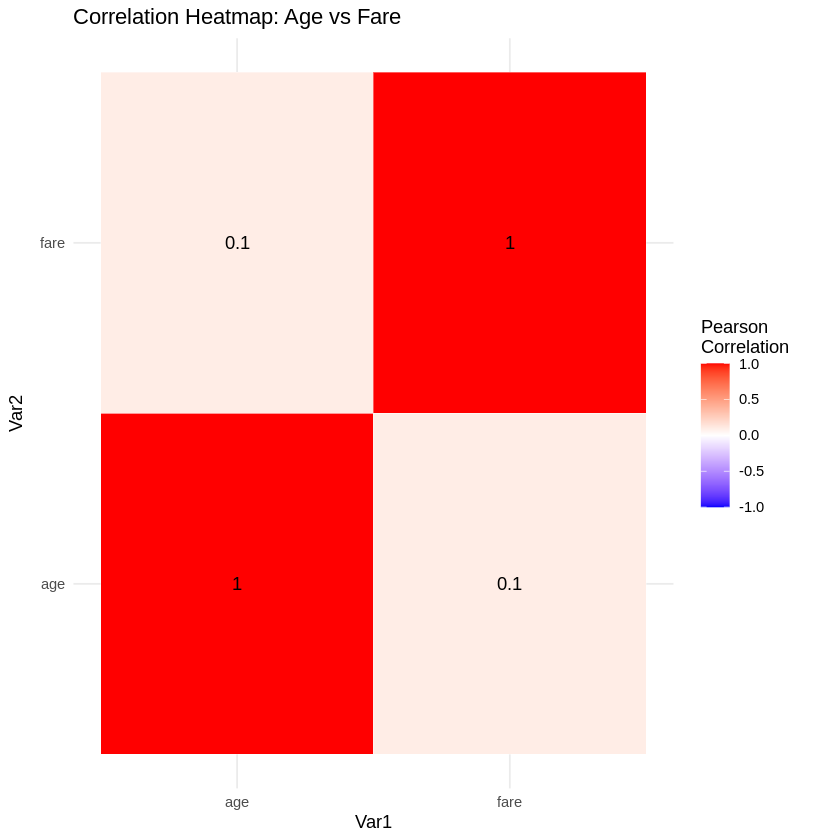

In [13]:
library(dplyr)
library(ggplot2)
install.packages("reshape2")
library(reshape2)

# Clean data: only age and fare, drop NAs
df_clean <- df %>% select(age, fare) %>% na.omit()

# Compute correlation matrix
corr_matrix <- cor(df_clean, method = "pearson")

print(corr_matrix)

# Convert matrix to long format for ggplot2
melted_corr <- melt(corr_matrix)

# Heatmap
ggplot(melted_corr, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(value, 2)), color = "black") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1, 1), space = "Lab",
                       name = "Pearson\nCorrelation") +
  labs(title = "Correlation Heatmap: Age vs Fare") +
  theme_minimal()


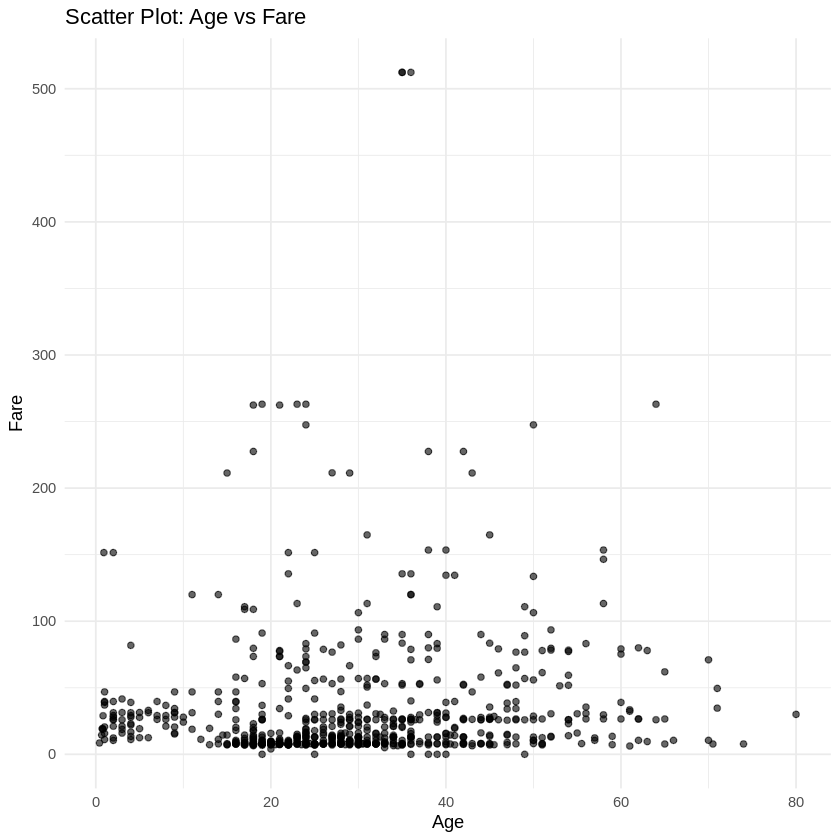

In [14]:
library(ggplot2)

# Scatter plot: Age vs Fare
ggplot(df_clean, aes(x = age, y = fare)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Scatter Plot: Age vs Fare",
    x = "Age",
    y = "Fare"
  ) +
  theme_minimal()


In [15]:
library(dplyr)

# Contingency table: class vs survived
survival_by_class <- table(df$class, df$survived)
print(survival_by_class)

# Normalize by row to get survival rate percentages
survival_by_class_norm <- prop.table(survival_by_class, margin = 1) * 100
print(round(survival_by_class_norm, 2))


        
           0   1
  First   80 136
  Second  97  87
  Third  372 119
        
             0     1
  First  37.04 62.96
  Second 52.72 47.28
  Third  75.76 24.24


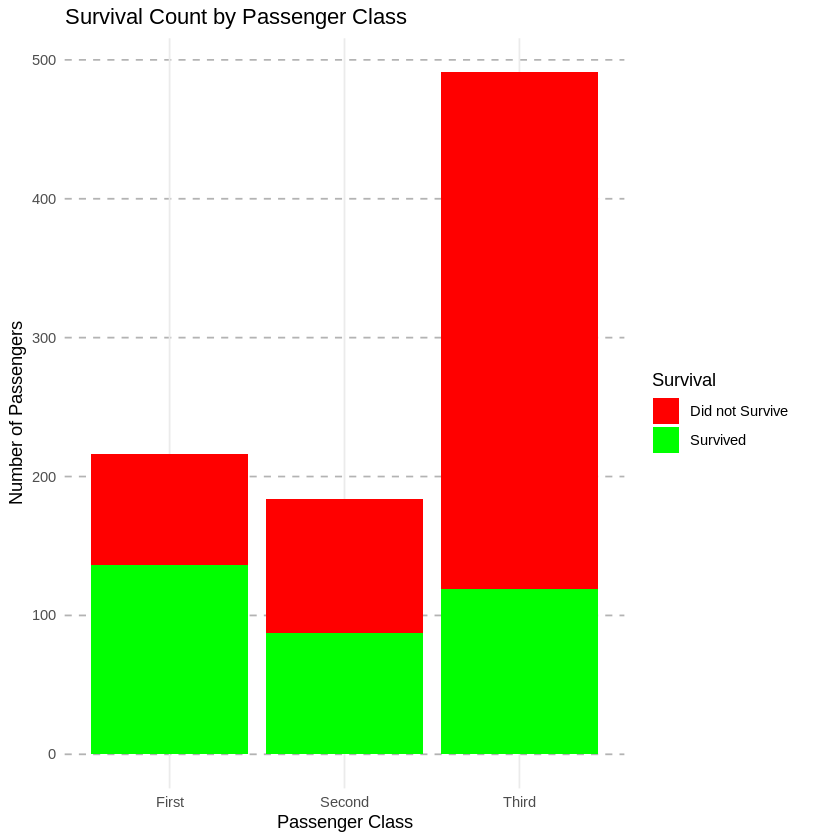

In [16]:
library(ggplot2)

# Contingency table: class vs survived → convert to data frame
survival_by_class <- as.data.frame(table(df$class, df$survived))
colnames(survival_by_class) <- c("Class", "Survived", "Count")

# Stacked bar chart
ggplot(survival_by_class, aes(x = Class, y = Count, fill = Survived)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("0" = "red", "1" = "green"),
                    labels = c("Did not Survive", "Survived"),
                    name = "Survival") +
  labs(
    title = "Survival Count by Passenger Class",
    x = "Passenger Class",
    y = "Number of Passengers"
  ) +
  theme_minimal() +
  theme(panel.grid.major.y = element_line(linetype = "dashed", color = "grey70"),
        panel.grid.minor = element_blank())
